In [12]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [13]:
df_canada = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [14]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
# print the dimensions of the dataframe
print(df_canada.shape)

(195, 43)


In [16]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_canada.columns = list(map(str, df_canada.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_canada.set_index('Country', inplace=True)

# add total column
df_canada['Total'] = df_canada.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_canada.shape)

data dimensions: (195, 38)


### Visualizing Data using Matplotlib

In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.2


### Pie Charts 

A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

Split: Splitting the data into groups based on some criteria.
Apply: Applying a function to each group independently:
.sum()
.count()
.mean() 
.std() 
.aggregate()
.apply()
.etc..


In [18]:
# group countries by continents and apply sum() function 
df_continents = df_canada.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_canada.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.

startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

shadow - Draws a shadow beneath the pie (to give a 3D feel).

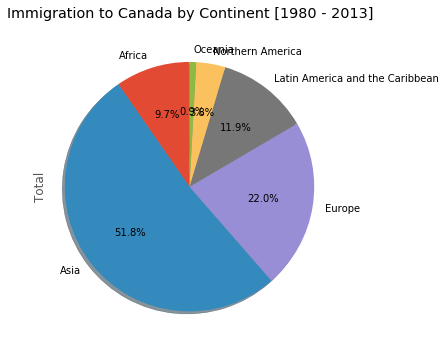

In [19]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

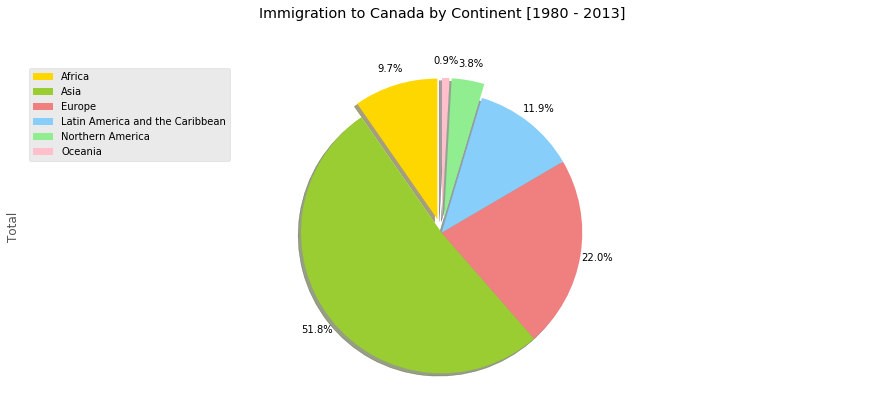

In [20]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels = df_continents.index, loc = 'upper left') 

plt.show()

Now using a pie chart, lets explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

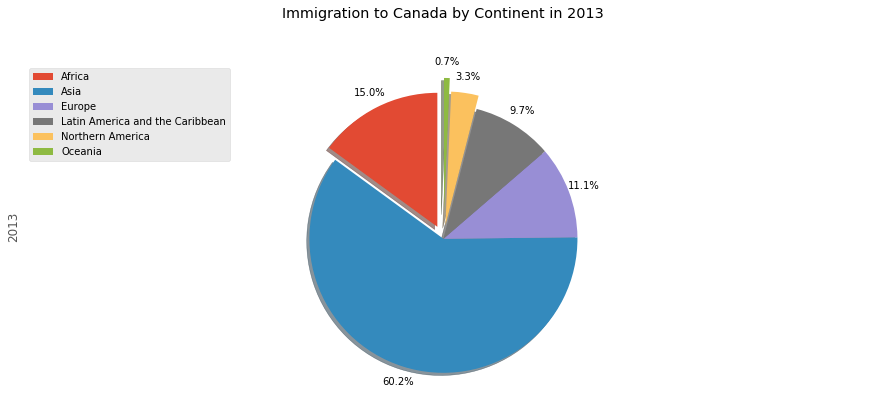

In [21]:
### type your answer here
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal')

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### Box Plots ¶

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

Minimun: Smallest number in the dataset.

First quartile: Middle number between the minimum and the median.

Second quartile (Median): Middle number of the (sorted) dataset.

Third quartile: Middle number between median and maximum.

Maximum: Highest number in the dataset.

In [22]:
# to get a dataframe, place extra square brackets around 'Greece'.
df_greece = df_canada.loc[['Greece'], years].transpose()
df_greece.head()

Country,Greece
1980,1065
1981,953
1982,897
1983,633
1984,580


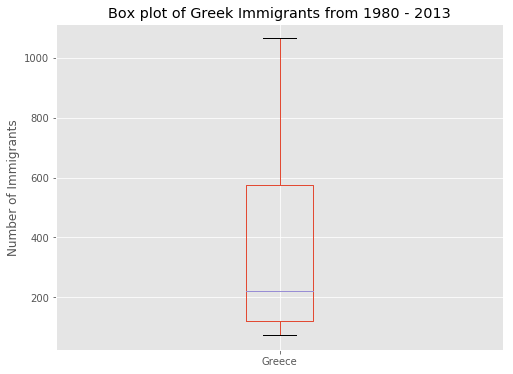

In [23]:
df_greece.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Greek Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [24]:
df_greece.describe()

Country,Greece
count,34.000000
mean,365.000000
std,290.809528
min,74.000000
25%,119.250000
50%,220.500000
75%,576.000000
max,1065.000000


In [26]:
df_GISP= df_canada.loc[['Greece', 'Italy', 'Spain', 'Portugal'], years].transpose()
df_GISP.head()

Country,Greece,Italy,Spain,Portugal
1980,1065,1820,211,4473
1981,953,2057,299,3486
1982,897,1480,260,2432
1983,633,820,133,1433
1984,580,858,137,1398


In [27]:
df_GISP.describe()

Country,Greece,Italy,Spain,Portugal
count,34.000000,34.000000,34.000000,34.000000
mean,365.000000,665.411765,147.588235,2181.382353
std,290.809528,420.594393,64.064890,2512.209531
min,74.000000,320.000000,78.000000,329.000000
25%,119.250000,387.000000,94.250000,528.750000
50%,220.500000,499.500000,133.000000,1202.000000
75%,576.000000,797.750000,172.750000,2570.750000
max,1065.000000,2057.000000,331.000000,8570.000000


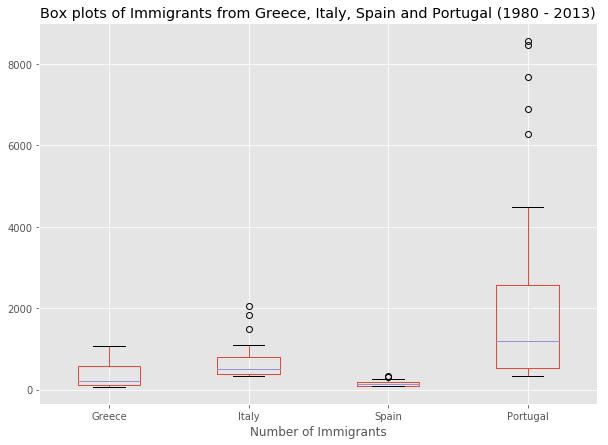

In [28]:
df_GISP.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from Greece, Italy, Spain and Portugal (1980 - 2013)')

plt.xlabel('Number of Immigrants')

plt.show()

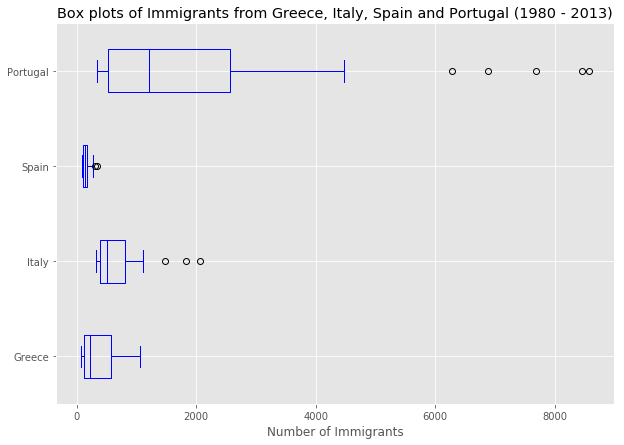

In [29]:
# horizontal box plots
df_GISP.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from Greece, Italy, Spain and Portugal (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

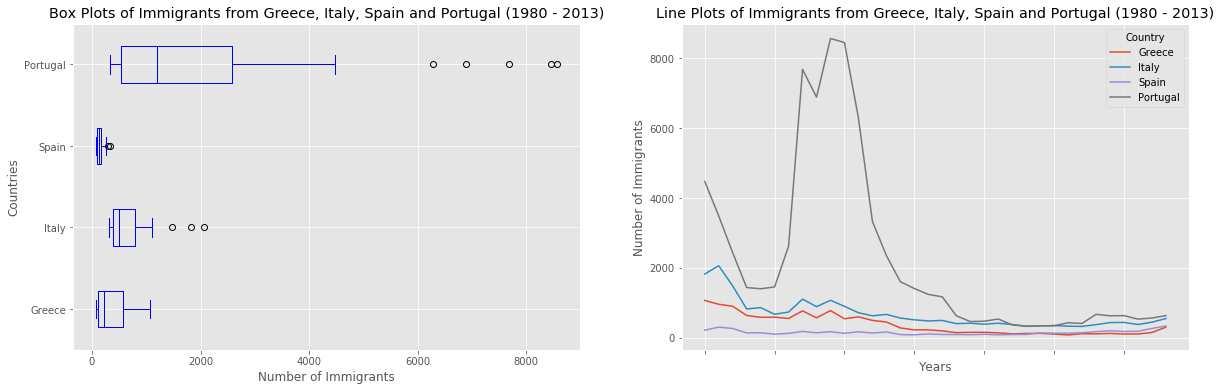

In [30]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_GISP.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from Greece, Italy, Spain and Portugal (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_GISP.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from Greece, Italy, Spain and Portugal (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [31]:
df_top20 = df_canada.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top20

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Let's create a new dataframe which contains the aggregate for each decade.

In [32]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

 # slice the original dataframe df_can to create a series for each decade
df_80s = df_top20.loc[:, years_80s].sum(axis=1) 
df_90s = df_top20.loc[:, years_90s].sum(axis=1) 
df_00s = df_top20.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [33]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


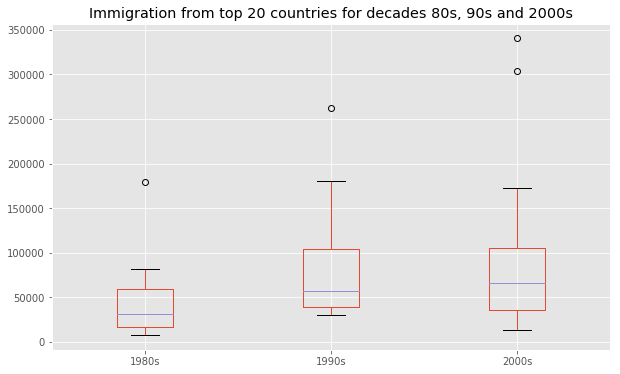

In [34]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 20 countries for decades 80s, 90s and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:


larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
smaller than Q1 by at least 1.5 times the IQR.
Let's look at decade 2000s as an example: 


Q1 (25%) = 36,101.5 

Q3 (75%) = 105,505.5 

IQR = Q3 - Q1 = 69,404 

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) 

Outlier > 209,611.5

In [35]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


### Scatter Plots 

A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

In [36]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


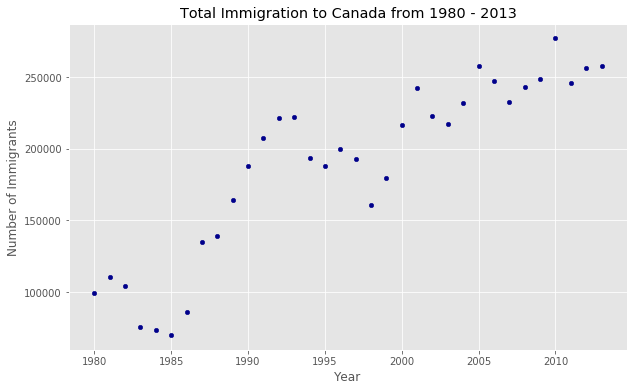

In [37]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.

y: y-coordinates of the data.

deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [38]:
x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([  5.56709228e+03,  -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

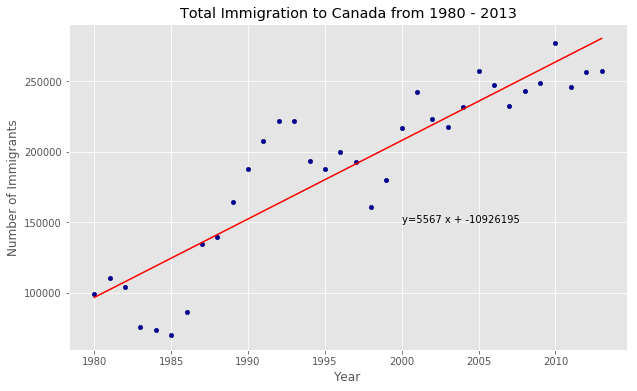

'No. Immigrants = 5567 * Year + -10926195'

In [39]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Create a scatter plot of the total immigration from Greece, Bulgaria, and Albania to Canada from 1980 to 2013?

In [41]:
# create df_countries dataframe
df_countries = df_canada.loc[['Greece', 'Bulgaria', 'Albania'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,1090
1,1981,973
2,1982,909
3,1983,666
4,1984,591


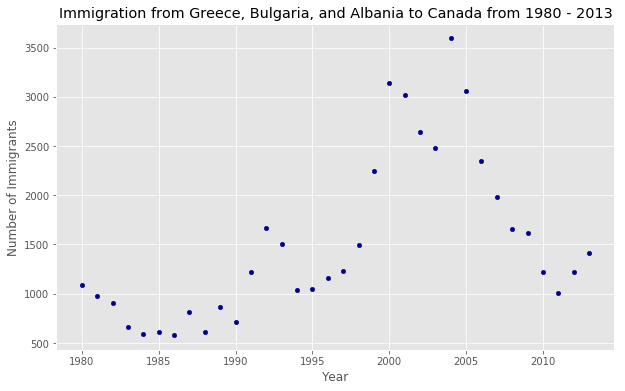

In [42]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Greece, Bulgaria, and Albania to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()

### Bubble Plots ¶

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In maplotlib, we can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

In [43]:
df_canada_bubble = df_canada[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_canada_bubble.index = map(int, df_canada_bubble.index)

# let's label the index. This will automatically be the column name when we reset the index
df_canada_bubble.index.name = 'Year'

# reset index to bring the Year in as a column
df_canada_bubble.reset_index(inplace=True)

# view the changes
df_canada_bubble.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Create the normalized weights.

In [45]:
# normalize Greece data
norm_greece = (df_canada_bubble['Greece'] - df_canada_bubble['Greece'].min()) / (df_canada_bubble['Greece'].max() - df_canada_bubble['Greece'].min())

# normalize Ireland data
norm_ireland = (df_canada_bubble['Ireland'] - df_canada_bubble['Ireland'].min()) / (df_canada_bubble['Ireland'].max() - df_canada_bubble['Ireland'].min())

Plot the data.

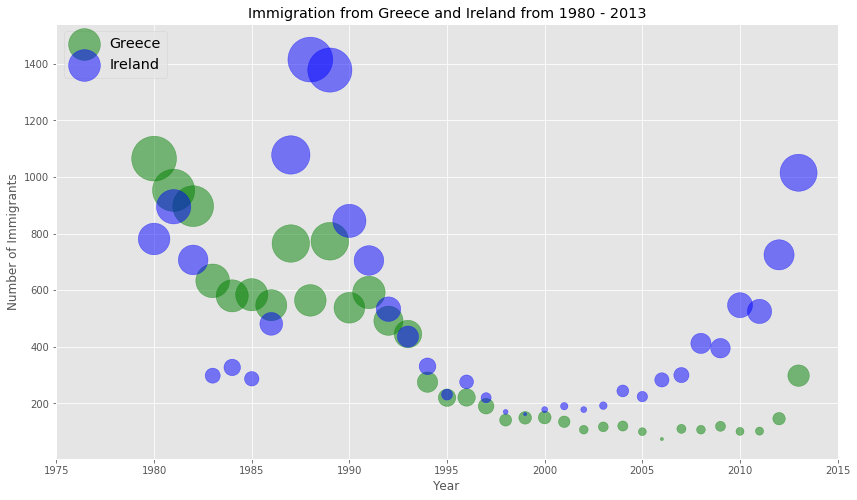

In [46]:
# Greece
ax0 = df_canada_bubble.plot(kind='scatter',
                    x='Year',
                    y='Greece',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_greece * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Ireland
ax1 = df_canada_bubble.plot(kind='scatter',
                    x='Year',
                    y='Ireland',
                    alpha=0.5,
                    color="blue",
                    s=norm_ireland * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Greece and Ireland from 1980 - 2013')
ax0.legend(['Greece', 'Ireland'], loc='upper left', fontsize='x-large')